# Antomating Crypto Website

# This project involves automating data retrieval and visualization for cryptocurrency prices using the CoinMarketCap API.

# Technologies Used
# -Programming Languages: Python
# -Data Manipulation & Analysis: Pandas
# -Data Visualization: Seaborn, Matplotlib
# -Additional Libraries: Time
# -API: CoinMarketCap


In [27]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '2d124f77-a1d1-4774-9566-d3965bdee572',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2024-07-29T19:22:51.747Z', 'error_code': 0, 'error_message': None, 'elapsed': 34, 'credit_count': 1, 'notice': None, 'total_count': 10029}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11617, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [29]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [31]:
df = pd.json_normalize(data['data'])
df['timestamp']= pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11617,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.973292e+07,1.973292e+07,False,NaN,1,NaN,NaN,None,2024-07-29T19:22:00.000Z,67444.850221,3.881564e+10,27.0180,0.187200,-1.114276,-0.326810,10.658706,-2.504264,12.247519,1.330883e+12,55.1929,1.416342e+12,None,2024-07-29T19:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-30 02:23:00.683212
1,1027,Ethereum,ETH,ethereum,9177,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202283e+08,1.202283e+08,True,NaN,2,NaN,NaN,None,2024-07-29T19:21:00.000Z,3313.314914,1.696490e+10,35.7686,-0.099516,1.301153,-4.810256,-2.106775,-12.779848,12.359965,3.983543e+11,16.5216,3.983543e+11,None,2024-07-29T19:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-30 02:23:00.683212
2,825,Tether USDt,USDT,tether,92896,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.144179e+11,1.170681e+11,True,NaN,3,NaN,NaN,None,2024-07-29T19:21:00.000Z,0.999812,6.078538e+10,26.5545,-0.016577,-0.009030,-0.055563,0.158140,-0.005608,0.098760,1.143963e+11,4.7445,1.170460e+11,None,2024-07-29T19:21:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-30 02:23:00.683212
3,5426,Solana,SOL,solana,709,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.648273e+08,5.811996e+08,True,NaN,4,NaN,NaN,None,2024-07-29T19:21:00.000Z,186.070751,3.422324e+09,32.0344,-0.264791,0.469844,2.192541,31.198399,9.340320,52.038414,8.649077e+10,3.5872,1.081443e+11,None,2024-07-29T19:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-30 02:23:00.683212
4,1839,BNB,BNB,bnb,2200,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.458675e+08,1.458675e+08,False,NaN,5,NaN,NaN,None,2024-07-29T19:21:00.000Z,576.660476,1.812023e+09,10.7069,0.031617,-1.217797,-3.212100,0.961658,-3.825094,1.474415,8.411604e+10,3.4884,8.411604e+10,None,2024-07-29T19:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-30 02:23:00.683212
5,3408,USDC,USDC,usd-coin,21204,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.384364e+10,3.384364e+10,False,NaN,6,NaN,NaN,None,2024-07-29T19:21:00.000Z,0.999987,6.406192e+09,31.9164,0.004345,0.001992,-0.007753,0.016224,-0.006703,0.027325,3.384321e+10,1.4036,3.384321e+10,None,2024-07-29T19:21:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-30 02:23:00.683212
6,52,XRP,XRP,xrp,1357,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.596087e+10,9.998741e+10,False,NaN,7,NaN,NaN,None,2024-07-29T19:22:00.000Z,0.603248,1.132680e+09,4.8546,-0.014270,0.040981,-2.904015,27.198338,14.873322,21.544774,3.375831e+10,1.3998,6.032484e+10,None,2024-07-29T19:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-30 02:23:00.683212
7,74,Dogecoin,DOGE,dogecoin,1028,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.453178e+11,1.453178e+11,True,NaN,8,NaN,NaN,None,2024-07-29T19:22:00.000Z,0.129316,8.048144e+08,-29.5108,-0.069759,-0.883378,-8.242825,5.354447,-20.489118,-1.021799,1.879186e+10,0.7792,1.879186e+10,None,2024-07-29T19:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-30 02:23:00.683212
8,11419,Toncoin,TON,toncoin,478,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.516624e+09

In [57]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '2d124f77-a1d1-4774-9566-d3965bdee572',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp']= pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\Kyi Phyu Shyun Latt\Desktop\API\API.csv'):
        df.to_csv(r'C:\Users\Kyi Phyu Shyun Latt\Desktop\API\API.csv', header='Column_names')
    else:
        df.to_csv(r'C:\Users\Kyi Phyu Shyun Latt\Desktop\API\API.csv',mode = 'a', header= False)

    



In [127]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API runner completed!')
    sleep(60)
exit()

{'status': {'timestamp': '2024-07-29T20:37:29.114Z', 'error_code': 0, 'error_message': None, 'elapsed': 30, 'credit_count': 1, 'notice': None, 'total_count': 10033}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11617, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

KeyboardInterrupt: 

In [130]:
df3 = pd.read_csv(r'C:\Users\Kyi Phyu Shyun Latt\Desktop\API\API.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11617,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19732915.00000,19732915.00000,False,NaN,1,NaN,NaN,NaN,2024-07-29T19:47:00.000Z,67444.97363,39046092004.31959,31.12670,0.14437,-0.97943,-0.89465,10.71034,-1.77904,12.30775,1330885931882.87988,55.13920,1416344446299.01001,NaN,2024-07-29T19:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-30 02:49:06.025136
1,1,1027,Ethereum,ETH,ethereum,9177,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120228315.01960,120228315.01960,True,NaN,2,NaN,NaN,NaN,2024-07-29T19:46:00.000Z,3311.46427,17093211461.51630,39.10650,-0.07913,1.23776,-5.12741,-2.00594,-12.19656,12.02415,398131769751.74237,16.50490,398131769751.73999,NaN,2024-07-29T19:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-30 02:49:06.025136
2,2,825,Tether USDt,USDT,tether,92897,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,114417852141.83316,117068083204.49164,True,NaN,3,NaN,NaN,NaN,2024-07-29T19:46:00.000Z,1.00001,61010414545.77587,29.13900,-0.03608,0.00862,-0.04065,0.16798,-0.01272,0.12234,114419371252.04506,4.74340,117069637501.46001,NaN,2024-07-29T19:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-30 02:49:06.025136
3,3,5426,Solana,SOL,solana,709,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,464827146.85235,581199459.82021,True,NaN,4,NaN,NaN,NaN,2024-07-29T19:46:00.000Z,186.71283,3430496727.36185,33.81510,0.26836,1.19224,2.33481,32.11282,10.71090,52.13019,86789190476.66907,3.59790,108517393970.74001,NaN,2024-07-29T19:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-30 02:49:06.025136
4,4,1839,BNB,BNB,bnb,2200,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,145867524.84239,145867524.84239,False,NaN,5,NaN,NaN,NaN,2024-07-29T19:46:00.000Z,578.80425,1820213288.65832,12.41230,0.14157,-0.86440,-2.74466,1.45424,-3.09972,1.55591,84428743100.41043,3.49870,84428743100.41000,NaN,2024-07-29T19:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-30 02:49:06.025136
5,5,52,XRP,XRP,xrp,1357,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55960868753.00000,99987409084.00000,False,NaN,6,NaN,NaN,NaN,2024-07-29T19:47:00.000Z,0.60604,1141019765.63751,6.63570,0.43624,0.51091,-2.14500,27.85514,15.90231,22.16039,33914276679.77529,1.40460,60603556441.32000,NaN,2024-07-29T19:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-30 02:49:06.025136
6,6,3408,USDC,USDC,usd-coin,21205,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,33873806080.48743,33873806080.48743,False,NaN,7,NaN,NaN,NaN,2024-07-29T19:46:00.000Z,1.00012,6460936584.33990,35.77550,-0.03151,0.01290,0.00073,0.02300,-0.02140,0.02975,33877778546.79375,1.40440,33877778546.79000,NaN,2024-07-29T19:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-30 02:49:06.025136
7,7,74,Dogecoin,DOGE,dogecoin,1028,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,145318126383.70517,145318126383.70517,True,NaN,8,NaN,NaN,NaN,2024-07-29T19:47:00.000Z,0.12964,801273500.23387,-22.47070,0.18556,-0.27615,-7.92974,5.87361,-19.80689,-1.29069,18838867393.26926,0.78030,18838867393.27000,NaN,2024-07-29T19:47:00.000Z

In [63]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11617,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.973292e+07,1.973292e+07,False,NaN,1,NaN,NaN,None,2024-07-29T19:54:00.000Z,67327.373732,3.906435e+10,32.0657,-0.060520,-1.219563,-1.286908,10.456900,-1.754456,12.846240,1.328565e+12,55.0876,1.413875e+12,None,2024-07-29T19:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-30 02:54:52.266013
1,1027,Ethereum,ETH,ethereum,9177,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202283e+08,1.202283e+08,True,NaN,2,NaN,NaN,None,2024-07-29T19:53:00.000Z,3309.486665,1.712120e+10,40.7168,-0.012657,1.057831,-5.409341,-2.121298,-12.039237,12.697393,3.978940e+11,16.4930,3.978940e+11,None,2024-07-29T19:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-30 02:54:52.266013
2,825,Tether USDt,USDT,tether,92899,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.144179e+11,1.170681e+11,True,NaN,3,NaN,NaN,None,2024-07-29T19:53:00.000Z,1.000271,6.108832e+10,30.5599,0.049872,0.038352,-0.019030,0.193679,0.032585,0.155804,1.144489e+11,4.7440,1.170999e+11,None,2024-07-29T19:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-30 02:54:52.266013
3,5426,Solana,SOL,solana,709,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.648271e+08,5.811995e+08,True,NaN,4,NaN,NaN,None,2024-07-29T19:53:00.000Z,186.714451,3.435772e+09,34.5618,0.392257,1.014952,2.026841,32.064272,10.932217,52.579929,8.678995e+10,3.5975,1.085183e+11,None,2024-07-29T19:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-30 02:54:52.266013
4,1839,BNB,BNB,bnb,2200,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.458675e+08,1.458675e+08,False,NaN,5,NaN,NaN,None,2024-07-29T19:53:00.000Z,578.048723,1.821634e+09,12.7575,0.030727,-1.007845,-3.002490,1.301113,-3.069971,1.728849,8.431854e+10,3.4960,8.431854e+10,None,2024-07-29T19:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-30 02:54:52.266013
5,52,XRP,XRP,xrp,1357,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.596087e+10,9.998741e+10,False,NaN,6,NaN,NaN,None,2024-07-29T19:54:00.000Z,0.605671,1.143611e+09,7.0341,0.395159,0.440912,-2.245705,27.826855,15.993910,22.229327,3.389389e+10,1.4049,6.056713e+10,None,2024-07-29T19:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-30 02:54:52.266013
6,3408,USDC,USDC,usd-coin,21205,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.387381e+10,3.387381e+10,False,NaN,7,NaN,NaN,None,2024-07-29T19:53:00.000Z,1.000096,6.489305e+09,37.6708,0.024166,0.016830,-0.004244,0.022918,-0.006494,0.030193,3.387704e+10,1.4042,3.387704e+10,None,2024-07-29T19:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-30 02:54:52.266013
7,74,Dogecoin,DOGE,dogecoin,1028,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.453181e+11,1.453181e+11,True,NaN,8,NaN,NaN,None,2024-07-29T19:54:00.000Z,0.129483,8.010213e+08,-21.7395,0.138347,-0.464240,-8.781337,5.651886,-19.578829,-1.180173,1.881627e+10,0.7799,1.881627e+10,None,2024-07-29T19:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-30 02:54:52.266013
8,11419,Toncoin,TON,toncoin,478,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.516624e+09,5.1

In [65]:
pd.set_option('display.float_format', lambda x : '%.5f' % x)

In [67]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11617,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19732915.00000,19732915.00000,False,NaN,1,NaN,NaN,None,2024-07-29T19:54:00.000Z,67327.37373,39064347223.35219,32.06570,-0.06052,-1.21956,-1.28691,10.45690,-1.75446,12.84624,1328565343032.96436,55.08760,1413874848378.57007,None,2024-07-29T19:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-30 02:54:52.266013
1,1027,Ethereum,ETH,ethereum,9177,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120228315.01960,120228315.01960,True,NaN,2,NaN,NaN,None,2024-07-29T19:53:00.000Z,3309.48667,17121196973.55743,40.71680,-0.01266,1.05783,-5.40934,-2.12130,-12.03924,12.69739,397894005342.90674,16.49300,397894005342.90997,None,2024-07-29T19:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-30 02:54:52.266013
2,825,Tether USDt,USDT,tether,92899,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,114417852141.83315,117068083204.49164,True,NaN,3,NaN,NaN,None,2024-07-29T19:53:00.000Z,1.00027,61088315649.10108,30.55990,0.04987,0.03835,-0.01903,0.19368,0.03258,0.15580,114448903048.48727,4.74400,117099853335.25000,None,2024-07-29T19:53:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-30 02:54:52.266013
3,5426,Solana,SOL,solana,709,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,464827146.85235,581199459.82021,True,NaN,4,NaN,NaN,None,2024-07-29T19:53:00.000Z,186.71445,3435772039.92754,34.56180,0.39226,1.01495,2.02684,32.06427,10.93222,52.57993,86789945766.60411,3.59750,108518338352.12000,None,2024-07-29T19:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-30 02:54:52.266013
4,1839,BNB,BNB,bnb,2200,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145867524.84239,145867524.84239,False,NaN,5,NaN,NaN,None,2024-07-29T19:53:00.000Z,578.04872,1821633629.11296,12.75750,0.03073,-1.00785,-3.00249,1.30111,-3.06997,1.72885,84318536442.87280,3.49600,84318536442.87000,None,2024-07-29T19:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-30 02:54:52.266013
5,52,XRP,XRP,xrp,1357,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55960868753.00000,99987409084.00000,False,NaN,6,NaN,NaN,None,2024-07-29T19:54:00.000Z,0.60567,1143611051.77800,7.03410,0.39516,0.44091,-2.24571,27.82686,15.99391,22.22933,33893890893.46998,1.40490,60567127796.16000,None,2024-07-29T19:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-30 02:54:52.266013
6,3408,USDC,USDC,usd-coin,21205,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33873806080.48743,33873806080.48743,False,NaN,7,NaN,NaN,None,2024-07-29T19:53:00.000Z,1.00010,6489305215.24115,37.67080,0.02417,0.01683,-0.00424,0.02292,-0.00649,0.03019,33877042727.68012,1.40420,33877042727.68000,None,2024-07-29T19:53:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-30 02:54:52.266013
7,74,Dogecoin,DOGE,dogecoin,1028,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145318126383.70517,145318126383.70517,True,NaN,8,NaN,NaN,None,2024-07-29T19:54:00.000Z,0.12948,801021296.21209,-21.73950,0.13835,-0.46424,-8.78134,5.65189,-19.57883,-1.18017,18816271378.76313,0.77990,18816271378.76000,None,2024-07-29T19:54:00.000Z,NaN,NaN,NaN

In [71]:
df4 = df.groupby('name',sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean(numeric_only = True)

In [73]:
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.06052,-1.21956,-1.28691,10.45690,-1.75446,12.84624
Ethereum,-0.01266,1.05783,-5.40934,-2.12130,-12.03924,12.69739
Tether USDt,0.04987,0.03835,-0.01903,0.19368,0.03258,0.15580
Solana,0.39226,1.01495,2.02684,32.06427,10.93222,52.57993
BNB,0.03073,-1.00785,-3.00249,1.30111,-3.06997,1.72885
XRP,0.39516,0.44091,-2.24571,27.82686,15.99391,22.22933
USDC,0.02417,0.01683,-0.00424,0.02292,-0.00649,0.03019
Dogecoin,0.13835,-0.46424,-8.78134,5.65189,-19.57883,-1.18017
Toncoin,0.39119,1.09332,-4.83462,-12.43174,2.86286,33.20881


In [77]:
df5 = df4.stack()
df5

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.06052
              quote.USD.percent_change_24h    -1.21956
              quote.USD.percent_change_7d     -1.28691
              quote.USD.percent_change_30d    10.45690
              quote.USD.percent_change_60d    -1.75446
              quote.USD.percent_change_90d    12.84624
Ethereum      quote.USD.percent_change_1h     -0.01266
              quote.USD.percent_change_24h     1.05783
              quote.USD.percent_change_7d     -5.40934
              quote.USD.percent_change_30d    -2.12130
              quote.USD.percent_change_60d   -12.03924
              quote.USD.percent_change_90d    12.69739
Tether USDt   quote.USD.percent_change_1h      0.04987
              quote.USD.percent_change_24h     0.03835
              quote.USD.percent_change_7d     -0.01903
              quote.USD.percent_change_30d     0.19368
              quote.USD.percent_change_60d     0.03258
              quote.US

In [79]:
type(df4)

pandas.core.frame.DataFrame

In [81]:
type(df5)

pandas.core.series.Series

In [83]:
df6 = df5.to_frame(name='values')

In [85]:
df6

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.06052
             quote.USD.percent_change_24h  -1.21956
             quote.USD.percent_change_7d   -1.28691
             quote.USD.percent_change_30d  10.45690
             quote.USD.percent_change_60d  -1.75446
             quote.USD.percent_change_90d  12.84624
Ethereum     quote.USD.percent_change_1h   -0.01266
             quote.USD.percent_change_24h   1.05783
             quote.USD.percent_change_7d   -5.40934
             quote.USD.percent_change_30d  -2.12130
             quote.USD.percent_change_60d -12.03924
             quote.USD.percent_change_90d  12.69739
Tether USDt  quote.USD.percent_change_1h    0.04987
             quote.USD.percent_change_24h   0.03835
             quote.USD.percent_change_7d   -0.01903
             quote.USD.percent_change_30d   0.19368
             quote.USD.percent_change_60d   0.03258
             quote.USD.percent_change_90d   0.15580
Solana       quote.USD.percent_change_1h    0.39226
             quote.USD.percent_change_24h   1.01495
             quote.USD.percent_change_7d    2.02684
             quote.USD.percent_change_30d  32.06427
             quote.USD.percent_change_60d  10.93222
             quote.USD.percent_change_90d  52.57993
BNB          quote.USD.percent_change_1h    0.03073
             quote.USD.percent_change_24h  -1.00785
             quote.USD.percent_change_7d   -3.00249
             quote.USD.percent_change_30d   1.30111
             quote.USD.percent_change_60d  -3.06997
             quote.USD.percent_change_90d   1.72885
XRP          quote.USD.percent_change_1h    0.39516
             quote.USD.percent_change_24h   0.44091
             quote.USD.percent_change_7d   -2.24571
             quote.USD.percent_change_30d  27.82686
             quote.USD.percent_change_60d  15.99391
             quote.USD.percent_change_90d  22.22933
USDC         quote.USD.percent_change_1h    0.02417
             quote.USD.percent_change_24h   0.01683
             quote.USD.percent_change_7d   -0.00424
             quote.USD.percent_change_30d   0.02292
             quote.USD.percent_change_60d  -0.00649
             quote.USD.percent_change_90d   0.03019
Dogecoin     quote.USD.percent_change_1h    0.13835
             quote.USD.percent_change_24h  -0.46424
             quote.USD.percent_change_7d   -8.78134
             quote.USD.percent_change_30d   5.65189
             quote.USD.percent_change_60d -19.57883
             quote.USD.percent_change_90d  -1.18017
Toncoin      quote.USD.percent_change_1h    0.39119
             quote.USD.percent_change_24h   1.09332
             quote.USD.percent_change_7d   -4.83462
             quote.USD.percent_change_30d -12.43174
             quote.USD.percent_change_60d   2.86286
             quote.USD.percent_change_90d  33.20881
Cardano      quote.USD.percent_change_1h   -0.68501
             quote.USD.percent_change_24h  -0.62259
             quote.USD.percent_change_7d   -5.61704
             quote.USD.percent_change_30d   5.50946
             quote.USD.percent_change_60d  -9.53278
             quote.USD.percent_change_90d  -5.85024
TRON         quote.USD.percent_change_1h    0.01468
             quote.USD.percent_change_24h  -0.48700
             quote.USD.percent_change_7d    3.75248
             quote.USD.percent_change_30d   9.75317
             quote.USD.percent_change_60d  23.41488
             quote.USD.percent_change_90d  16.93390
Avalanche    quote.USD.percent_change_1h    0.04106
             quote.USD.percent_change_24h  -0.18150
             quote.USD.percent_change_7d  -14.88991
             quote.USD.percent_change_30d  -1.25640
             quote.USD.percent_change_60d -24.73815
             quote.USD.percent_change_90d -14.72840
Shiba Inu    quote.USD.percent_change_1h    0.33423
             quote.USD.percent_change_24h  -0.33758
             quote.USD.percent_change_7d   -6.08002
             quote.USD.percent_change_30d

In [97]:
index = pd.Index(range(90))
df7 = df6.set_index(index)
df7 = df6.reset_index()
df7
df8 = df7.rename(columns={'level_1' : 'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.06052
1,Bitcoin,quote.USD.percent_change_24h,-1.21956
2,Bitcoin,quote.USD.percent_change_7d,-1.28691
3,Bitcoin,quote.USD.percent_change_30d,10.45690
4,Bitcoin,quote.USD.percent_change_60d,-1.75446
5,Bitcoin,quote.USD.percent_change_90d,12.84624
6,Ethereum,quote.USD.percent_change_1h,-0.01266
7,Ethereum,quote.USD.percent_change_24h,1.05783
8,Ethereum,quote.USD.percent_change_7d,-5.40934
9,Ethereum,quote.USD.percent_change_30d,-2.12130


In [105]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

In [109]:
df8

,name,percent_change,values
0,Bitcoin,1h,-0.06052
1,Bitcoin,24h,-1.21956
2,Bitcoin,7d,-1.28691
3,Bitcoin,30d,10.45690
4,Bitcoin,60d,-1.75446
5,Bitcoin,90d,12.84624
6,Ethereum,1h,-0.01266
7,Ethereum,24h,1.05783
8,Ethereum,7d,-5.40934
9,Ethereum,30d,-2.12130


In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

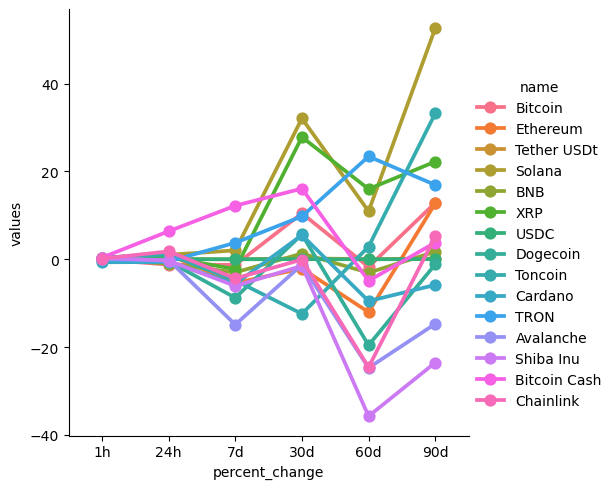

In [113]:
sns.catplot(x='percent_change',y='values',hue='name', data=df8, kind='point')

In [132]:
df9 = df3[['name','quote.USD.price','timestamp']]
df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,67444.97363,2024-07-30 02:49:06.025136
15,Bitcoin,67429.23645,2024-07-30 02:50:06.868257
30,Bitcoin,67327.37373,2024-07-30 02:54:52.266013
45,Bitcoin,67271.10653,2024-07-30 03:37:30.428127
60,Bitcoin,67300.34649,2024-07-30 03:38:31.561706


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

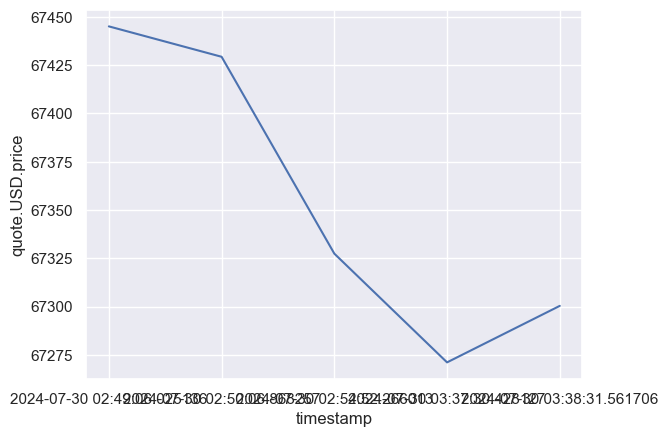

In [138]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp',y='quote.USD.price', data = df9)

